# Bias and Variance

## Overview
> * Objective 01 - Understand the Metrics used in model evaluation
> * Objective 02 - Define and determine variance
> * Objective 03 - Differentiate overfit vs underfit models
> * Objective 04 - Consider the bias/variance tradeoff in linear regression

Throughout this week, we've learned:
- How to use OLS to fit a model 
- How to determine the correlation between independent features. 

One thing we haven't discussed is how to measure the performance of a regression model. 
- The assumptions of a linear regression models and how to assess their validity. 
- What makes a good model? 
- What makes a bad model? 
- Between two models, which should we pick and why? 


### The Process of Data Science

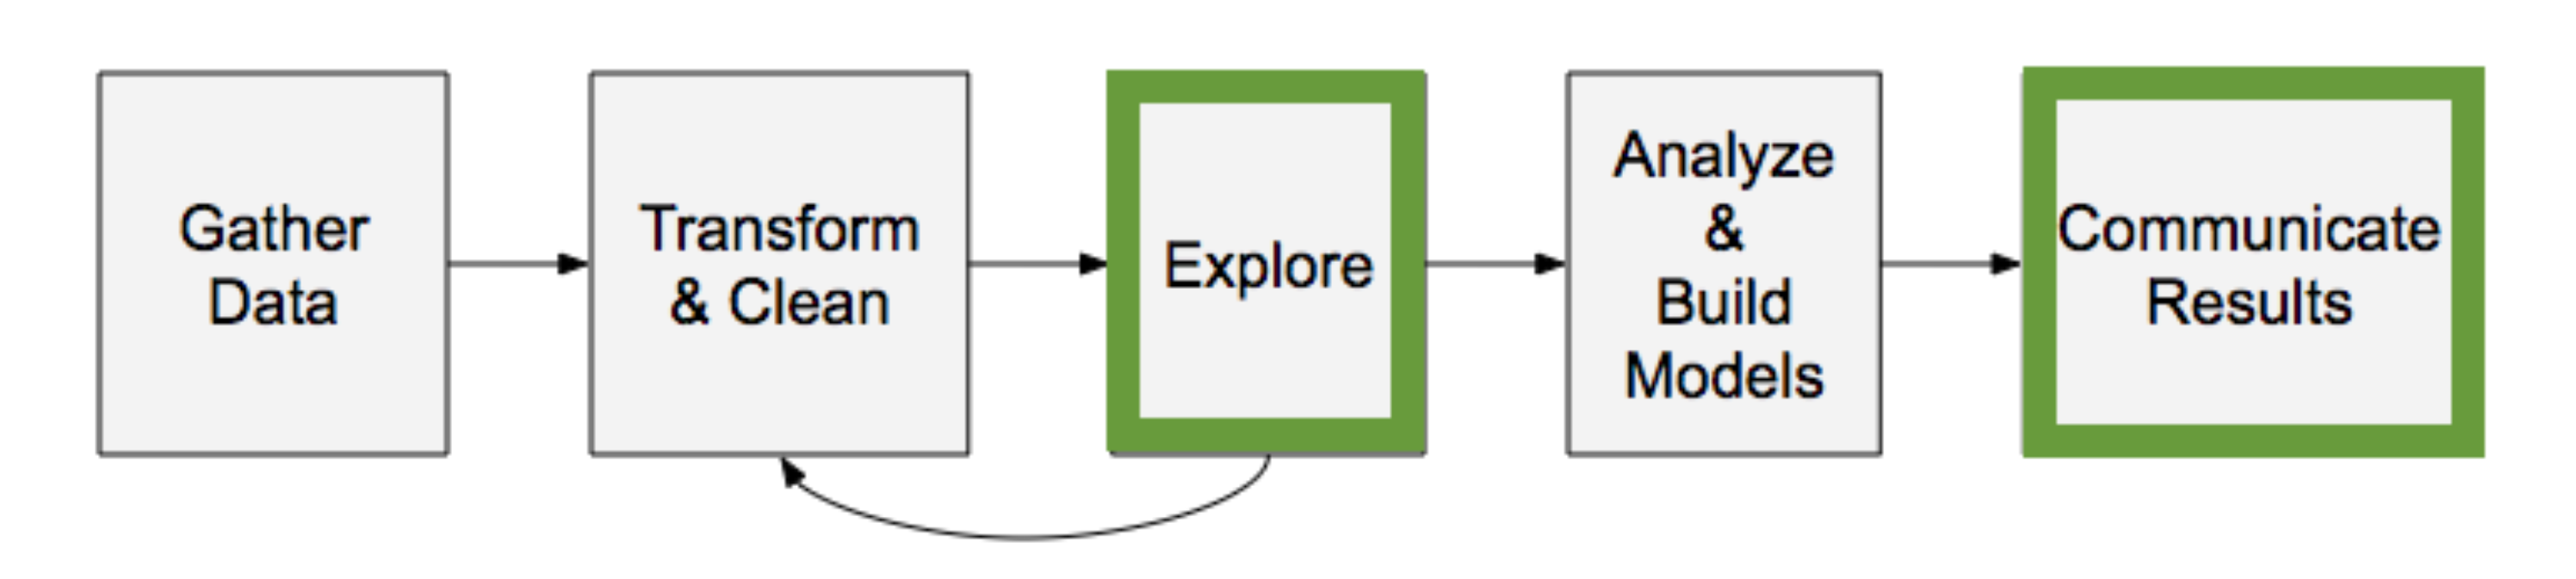

> As part of communicating results, we are also reporting our model's evaluations. In other words, once we build our models, we want to be able to [evaluate their performance](https://scikit-learn.org/stable/modules/model_evaluation.html).

## Regression Metrics

When you build a machine learning model, you are teaching a model to learn the given data and generate predictions based on the pattern observed during the learning process. 

We can always choose to continue improving our model, based on the results we get. We can quantify a model's performance using metrics. 


There are many different metrics we can use. The most commonly used are **MSE**, **RMSE** and **$R^2$** 
- Mean Squared Error
- Root Mean Squared Error
- Median and Mean Absolute Error
- $R^2$


We use metrics to evaluate the quality of our model performance. This can get tricky when we have to maintain the flexibility of the model to account for new variables, without compromising on the correctness of the model.

In [2]:
import seaborn as sns
sns.get_dataset_names()
autos = sns.load_dataset('mpg')

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [4]:
autos.head() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
autos.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [6]:
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
autos[autos['horsepower'].isnull()]

autos[autos['cylinders'] == 4 ]['horsepower'].mean()

78.28140703517587

In [8]:
autos[autos['cylinders'] == 6 ]['horsepower'].mean()

101.50602409638554

In [9]:
autos[autos['horsepower'].isnull()]

autos.loc[[32, 330, 336,354,374], 'horsepower'] = 78.0
autos.loc[126, 'horsepower'] = 102

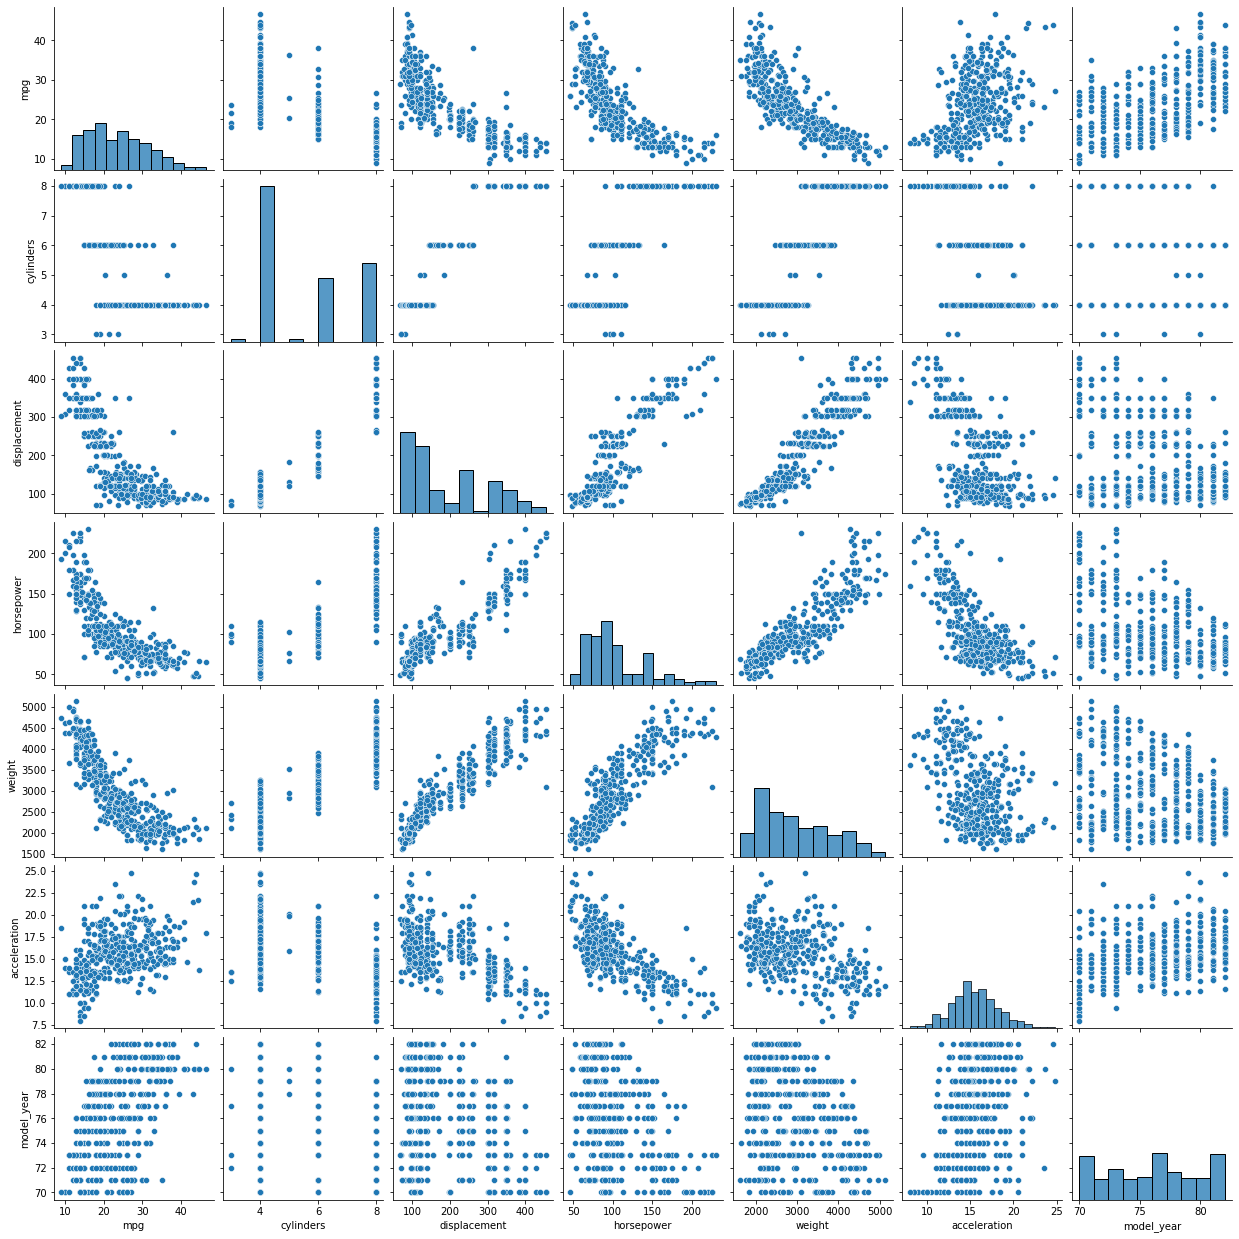

In [10]:
sns.pairplot(autos)

In [11]:
model = ols('mpg ~ displacement  + horsepower + weight', data= autos).fit()
print(model.summary())
autos['y_preds'] = model.predict(autos[['displacement', 'horsepower', 'weight']])

NameError: name 'ols' is not defined

In [ ]:

autos['residuals'] = autos['mpg'] - autos['y_preds']

###  Four Assumptions of Linear Regression
(This may come up in interviews) 

1. Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y.

2. Independence: The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.

3. Homoscedasticity: The residuals have constant variance at every level of x.

4. Normality: The residuals of the model are normally distributed.

[Source](https://www.statology.org/linear-regression-assumptions/)

## Metrics

We use metrics to evaluate the quality of the our predictions produced by our models. Since our focus this week is on regression, the things we look at are: 

### Residual *****


residual = true value - predicted value \
or 
### $(y - \hat{y})$

### Absolute Error ****


If describing our error amount is a priority, or you want get the exact unit of value from your predictions, you measure absolute error.

*Remember: over prediction vs under predition with your residual values*


#### Sum of Squared Errors

When we square the residual, we do so because no matter if the error is positive or negative, the result will always be positive. 


## $SSE = \sum_{n=1}^n{(y_i - \hat{y_i})^2}$

n = number of data points

y = true values

$\hat{y}$ = predicted values

In [ ]:
def sum_squared_error(true, preds):
    residuals = true - preds
    squared_values = residuals**2
    return sum(squared_values)

sum_squared_error(autos['mpg'], autos['y_preds'])

## Total Variance


# $\sum_{n=1}^n{(y_i - \bar{y})^2}$

$y_i$ = each individual y value

$\bar{y}$ = the mean of all y values

The squared difference between actual values and the mean. Total variance is a way of saying the variance of y. Variance is a measure to describe how spread out each value is from the mean. 


In [15]:
autos['mean'] = autos['mpg'].mean()

sum((autos['mpg'] - autos['mean'])**2)

24252.575477386938

# $ MSE = \frac{1}{n}\Sigma_{i=1}^{n}{(y_i -\hat{y_i})^2}$

n = number of data points

y = true values

$\hat{y}$ = predicted values

In [349]:
#calculate manually 

def mean_squared_error(true, preds):
    residuals = true - preds
    squared_values = residuals**2
    mse  = squared_values.mean()
    return mse


mean_squared_error(autos['mpg'], autos['y_preds'])

17.956196699881374

In [350]:
#or use sklearn

import sklearn.metrics as metrics

print(metrics.mean_squared_error(autos['mpg'], autos['y_preds']))

print(model.summary())


17.956196699881385
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     314.4
Date:                Thu, 27 Jan 2022   Prob (F-statistic):          3.85e-104
Time:                        10:10:30   Log-Likelihood:                -1139.4
No. Observations:                 398   AIC:                             2287.
Df Residuals:                     394   BIC:                             2303.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       44.9671      

Usefulness:
- Minimize value to 0
- Common metric, used in many calculations. 
- Represents the average distances squared from the predicted values

Drawbacks:
- Affected by outliers
- Not part of y original units. 
- Affected by the scale of y

#### Root Mean Square Error

# $ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{(y_i -\hat{y_i})^2}}$

n = number of data points

y = true values

$\hat{y}$ = predicted values

In [351]:
#calculate manually 

def root_mean_squared_error(true, preds):
    residuals = true - preds
    squared_values = residuals**2
    mse  = squared_values.mean()
    rmse = np.sqrt(mse)
    return rmse


root_mean_squared_error(autos['mpg'], autos['y_preds'])


#with numpy
import numpy as np
np.sqrt(metrics.mean_squared_error(autos['mpg'], autos['y_preds']))

4.2374752742501505

Usefulness: 
- Minimize value to 0
- Common metric
- RMSE can be directly interpreted in terms of measurement units, and hence it is a better measure of fit than a correlation coefficient.

Drawbacks:
- Affected by outliers. 
- Depends on the scale of y. 

#### Mean Absolute Error (or Deviation)

# $ MAE  = \frac{\Sigma{|x_i - x|} }{n}$

n = number of data points

x = residual values

In [352]:
autos

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,y_preds,residuals
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,18.908466,-0.908466
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,16.221323,-1.221323
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,18.408292,-0.408292
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,18.507057,-2.507057
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,18.834233,-1.834233
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,25.538026,1.461974
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,30.741675,13.258325
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,28.334942,3.665058
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,26.833097,1.166903


In [353]:
#manually 

def mae(true, preds):
    residuals = true - preds
    absolutes = np.abs(residuals)
    sum_abs = sum(absolutes)
    return sum_abs/len(true)

In [354]:

#metrics library
print (metrics.mean_absolute_error(autos['mpg'], autos['y_preds']))

mae(autos['mpg'], autos['y_preds'])

3.251727577093057


3.2517275770930563

Usefulness:
- Minimize value to 0
- In the original units of y.
- Less sensitive to outliers than MSE or RMSE. 

Drawbacks: 
- Depends on the scale of y.


### Residual Normalcy
This is one of the assumptions of a linear regression model.

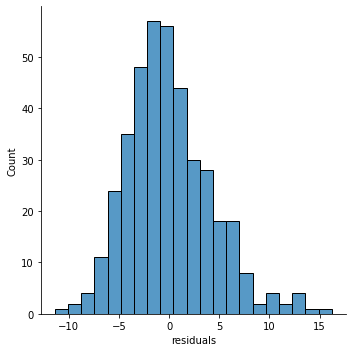

In [355]:
import seaborn as sns
sns.displot(autos['residuals'])

# R2
(Coefficient of determination)

# $r2 = 1 - \frac{\Sigma{(y_i -\hat{y_i})^2}}{\Sigma{(y_i - \bar{y})^2}}$

n = number of data points

y = true values

$\hat{y}$ = predicted values

$\bar{y}$ = mean value


> r2 = 1: Model explains all the variability of the response data around its mean. Precise predictions. \
> r2 = 0:  Model explains none of the variability of the response data around its mean. Predictions are not precise. 

In [356]:
sum_squared_error(autos['mpg'], autos['y_preds'])

7146.566286552787

In [357]:
#manually calculated
def r2(true, preds):
    numerator = sum_squared_error(true, preds)
    true_mean = true.mean()
    residual_list = []
    for i in true:
        residual_list.append((i - true_mean)**2)
    denominator = sum(residual_list)
    return 1 - numerator/denominator
    

#sklearn 
print("correct:", metrics.r2_score(autos['mpg'], autos['y_preds']))

r2(autos['mpg'], autos['y_preds'])

correct: 0.7053275313701739


0.7053275313701741

Usefulness:
- Easy to interpret: "An R2 of 0.8 means that 80% of the variability in the data are explained by our model, relative to a model with no predictors." 
- Measure as close to 1 as possible. 
- Does not depend on the scale of y. 
- Measurement goes beyond just linear regression. 

Drawback:
- Influenced by additional variables (use adj_r2 to penalize additional features). 

# Bias and Variance

Question: How do we evaluate error?

The problem with any model can be evaluated as having to do with **high bias**, or **high variance**. These can be referred to as models that **underfit** or **overfit** your observed values. Knowing your model's performance on known and unknown data can help you determine how to improve your model. 


Common stragies for dealing with **bias** and **variance**.

- Get more data
- Get a more representative sample of data
- Increase complexity of model
- Decrease complexity of model
- Regularize (Sprint 5)

The goal we typically have in mind with modeling is to **generalize** our estimations well.

### Briefly:  SSE

## $SSE = \sum_{n=1}^n{(y_i - \hat{y_i})^2}$

![image.png](./images/image.png)

### Decomposing error, $E[SSE]$

The expected values of SSE, decomposes into 3 components:

1. **Bias** (aka $bias^2$)
> $(E[\hat{y}] - y)^2$
>
> How much predicted values differ from true values.
1. **Variance** 
> $E[\hat{y} - E[\hat{y}]]^2$
>
> How much do predictions differ. 
1. **$\sigma^2$** - Irreducible Error

<center><h2> $E[SSE] = \text{bias}^2 + variance + \sigma^2$</h2></center>


> **Irreducible error(s):**
>
> - Error that cannot be reduced by model improvement.
> - Error due to randomness or natural variability in an existing system.



What happens to bias as our predictions get closer to our true value? 

What happens to variance as we decrease bias? 

### Suppose we want to build a model to best predict "mpg" using "horsepower".

#### Bias

The average difference between our model $\hat{y}$ and the truth $y$.

- Low bias: On average, our predictions are _correct_.
- High bias: As bias increases, our predictions, on average, get more and more _incorrect_.
   - High error 
   - Model too simple
   - Diagnosis:  _Underfit_

#### Variance

The amount of variation in our model.

- Low variance: Our predictions consistently hit the same value.
- High variance: Our predictions get more and more spread out.
  - Low error
  - Model too complex
  - Diagnosis:  _Overfit_

## How does bias occur?

![highbias](./images/highbias.png)


- Our model is too simple for our data.
- On average, our model $\hat{y}$ is going to be far from the truth $y$.
- For example, I tried to model a curved relationship with a straight line.
- When we rely on simplifying assumptions that aren’t valid (i.e.linearity), we can run into high bias.
 - Linear regression is an method where we might suffer from high bias.

## How does variance occur?
![variance](./images/highvariance.png)
Basically, more variance points us to believe our model is too complex.

- Our model $\hat{y}$ matches our data too closely.
- May not perform well on data it hasn't seen yet.
- We may not have enough data.
- Our model may "fit" very well to data it's seen, but not generalize well to data it hasn't.

## Tradeoff

Our goal is to minimize the error, testing the accuracy of our model on unseen data, then evaluating if it's overfit or underfit. We are trying to find a balance of bias and variance that allows us to generalize well. 

### Increasing Model Complexity
- Bias decreases
- Variance increases (the model is more squiggly)

![tradeoff](./images/tradeoff.png)


In [358]:
model = ols('mpg ~ horsepower', data= autos).fit()
print(model.summary())
autos['y_preds'] = model.predict()
autos['residuals']= autos['mpg'] - autos['y_preds']

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     598.0
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           3.73e-81
Time:                        10:10:30   Log-Likelihood:                -1199.4
No. Observations:                 398   AIC:                             2403.
Df Residuals:                     396   BIC:                             2411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9914      0.718     55.712      0.0

In [359]:
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,y_preds,residuals
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,19.421200,-1.421200
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,13.883061,1.116939
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,16.256549,1.743451
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,16.256549,-0.256549
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,17.838875,-0.838875


In [360]:
np.sqrt(metrics.mean_squared_error(autos['mpg'], autos['y_preds']))

4.927047948726044

In [361]:
model.params

Intercept     39.991431
horsepower    -0.158233
dtype: float64

In [362]:
autos_subset= autos[['mpg', 'horsepower']]

In [363]:
autos_subset.describe()

,mpg,horsepower
count,398.000000,398.000000
mean,23.514573,104.130653
std,7.815984,38.313213
min,9.000000,46.000000
25%,17.500000,76.000000
50%,23.000000,92.000000
75%,29.000000,125.000000
max,46.600000,230.000000


In [364]:
mpg_add = np.random.randint(17.5, 29, size =(50, 1))
horsepower_add = np.random.randint(76, 125, size=(50,1))

df_add = pd.DataFrame(np.concatenate([mpg_add, horsepower_add], axis = 1), columns= autos_subset.columns)


In [365]:
i, b = model.params

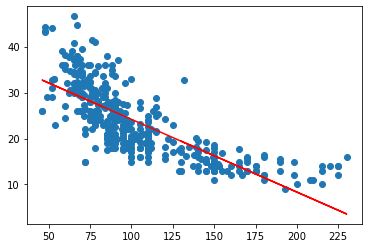

In [366]:
plt.scatter(autos_subset['horsepower'], autos_subset['mpg'])
plt.plot(autos_subset['horsepower'], b*autos_subset['horsepower'] + i, color = 'r')

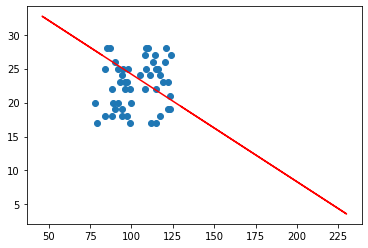

In [367]:
plt.scatter(df_add['horsepower'], df_add['mpg'])

plt.plot(autos_subset['horsepower'], b*autos_subset['horsepower'] + i, color = 'r')

In [375]:
model_right = ols('mpg ~ horsepower', data= autos_subset).fit()
print(model_right.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     598.0
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           3.73e-81
Time:                        10:18:37   Log-Likelihood:                -1199.4
No. Observations:                 398   AIC:                             2403.
Df Residuals:                     396   BIC:                             2411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9914      0.718     55.712      0.0

In [371]:
model_wrong = ols('mpg ~ horsepower', data= df_add).fit()

print(model_wrong.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.846
Date:                Thu, 27 Jan 2022   Prob (F-statistic):              0.181
Time:                        10:16:06   Log-Likelihood:                -132.21
No. Observations:                  50   AIC:                             268.4
Df Residuals:                      48   BIC:                             272.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.4008      3.858      4.511      0.0

In [379]:
autos_subset['y_preds'] = model_right.predict().copy()
df_add['y_preds'] = model_wrong.predict().copy()
print(np.sqrt(metrics.mean_squared_error(autos_subset['mpg'], autos_subset['y_preds'])))
print(np.sqrt(metrics.mean_squared_error(df_add['mpg'], df_add['y_preds'])))

4.927047948726044
3.405001808932064


<ipython-input-379-96bc5c4b467c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos_subset['y_preds'] = model_right.predict().copy()


In [382]:
first_auto = autos_subset[:300]
last_auto = autos_subset[300:]

In [387]:
model_first = ols("mpg ~ horsepower", data= first_auto).fit()
print(model_first.summary())
i, b = model_first.params
print(i,b)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     532.7
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           2.63e-68
Time:                        10:24:43   Log-Likelihood:                -822.87
No. Observations:                 300   AIC:                             1650.
Df Residuals:                     298   BIC:                             1657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.7885      0.644     54.017      0.0

In [388]:
model_last = ols("mpg ~ horsepower", data= last_auto).fit()
print(model_last.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     68.61
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           7.12e-13
Time:                        10:24:46   Log-Likelihood:                -287.21
No. Observations:                  98   AIC:                             578.4
Df Residuals:                      96   BIC:                             583.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.7373      2.329     21.782      0.0

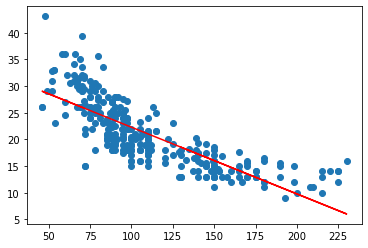

In [390]:
plt.scatter(first_auto['horsepower'], first_auto['mpg'])

plt.plot(first_auto['horsepower'], b*first_auto['horsepower'] + i, color = 'r')

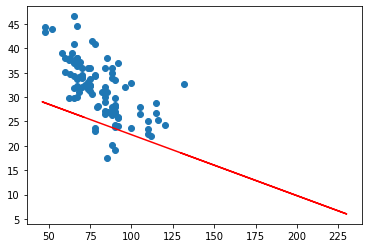

In [391]:
plt.scatter(last_auto['horsepower'], last_auto['mpg'])


plt.plot(first_auto['horsepower'], b*first_auto['horsepower'] + i, color = 'r')

In [393]:
first_auto['y_preds'] = model_first.predict().copy()
last_auto['y_preds'] = model_last.predict().copy()
print(np.sqrt(metrics.mean_squared_error(first_auto['mpg'], first_auto['y_preds'])))
print(np.sqrt(metrics.mean_squared_error(last_auto['mpg'], last_auto['y_preds'])))

3.7582654874532295
4.534767100958606


<ipython-input-393-113b3330765b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_auto['y_preds'] = model_first.predict().copy()
<ipython-input-393-113b3330765b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_auto['y_preds'] = model_last.predict().copy()


Resources:

https://online.stat.psu.edu/stat501/lesson/2/2.10